# Data Aggregation and Group Operations

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
# system
import os
system = list(os.uname())[0]
if system == 'Linux':
    base_dir = "/home/emuro/git/github/"
elif system == 'Darwin':
    base_dir = "~/PycharmProjects/"
base_dir += "pydata-book/"
print(base_dir)

/home/emuro/git/github/pydata-book/


## How to Think About Group Operations

In [3]:
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
                    "data1" : np.random.standard_normal(7),
                    "data2" : np.random.standard_normal(7)})

df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [4]:
grouped = df["data1"].groupby(df["key1"])
display(grouped)

In [5]:
grouped.mean()

key1
a    0.555881
b    0.705025
Name: data1, dtype: float64

In [6]:
grouped.std()

key1
a    0.801830
b    1.782977
Name: data1, dtype: float64

In [7]:
means = df["data1"].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1      -0.204708
      2       0.478943
b     1       1.965781
      2      -0.555730
Name: data1, dtype: float64

In [8]:
means.unstack()

key2,1,2
key1,,
a,-0.204708,0.478943
b,1.965781,-0.555730


In [9]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

df["data1"].groupby([states, years]).mean()

CA  2005    0.936175
    2006   -0.519439
OH  2005   -0.380219
    2006    1.029344
Name: data1, dtype: float64

In [10]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.555881,0.441920
b,1.5,0.705025,-0.144516


In [11]:
df.groupby("key2").mean()

,data1,data2
key2,,
1,0.333636,0.115218
2,-0.038393,0.888106


In [12]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1    -0.204708  0.281746
     2     0.478943  0.769023
b    1     1.965781 -1.296221
     2    -0.555730  1.007189

In [13]:
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [14]:
df.groupby(["key1", "key2"],dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [15]:
df.groupby("key1",dropna=False).size()

key1
a      3
b      2
NaN    2
dtype: int64

In [16]:
df.groupby("key1",dropna=False).count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2
NaN,2,2,2


### Iterating Over Other Groups

In [17]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [18]:
for name, group in df.groupby("key1", dropna=False):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1 -0.204708  0.281746
1    a     2  0.478943  0.769023
5    a  <NA>  1.393406  0.274992
b
  key1  key2     data1     data2
3    b     2 -0.555730  1.007189
4    b     1  1.965781 -1.296221
nan
   key1  key2     data1     data2
2  None     1 -0.519439  1.246435
6  None     1  0.092908  0.228913


In [19]:
for (k1, k2), group in df.groupby(["key1","key2"], dropna=False):
    print((k1,k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1 -0.204708  0.281746
('a', 2)
  key1  key2     data1     data2
1    a     2  0.478943  0.769023
('a', <NA>)
  key1  key2     data1     data2
5    a  <NA>  1.393406  0.274992
('b', 1)
  key1  key2     data1     data2
4    b     1  1.965781 -1.296221
('b', 2)
  key1  key2    data1     data2
3    b     2 -0.55573  1.007189
(nan, 1)
   key1  key2     data1     data2
2  None     1 -0.519439  1.246435
6  None     1  0.092908  0.228913


In [20]:
pieces = {name: group for name, group in df.groupby("key1")}
pieces["b"]
#pieces

,key1,key2,data1,data2
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221


In [21]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [22]:
grouped = df.groupby({"key1":"key", "key2":"key", "data1":"data", "data2":"data"}, axis="columns")
for key, val in grouped:
    print(key)
    print(val)

data
      data1     data2
0 -0.204708  0.281746
1  0.478943  0.769023
2 -0.519439  1.246435
3 -0.555730  1.007189
4  1.965781 -1.296221
5  1.393406  0.274992
6  0.092908  0.228913
key
   key1  key2
0     a     1
1     a     2
2  None     1
3     b     2
4     b     1
5     a  <NA>
6  None     1


### Selecting a Column or Subset of Columns

In [23]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [24]:
df.groupby("key1")["data1"]
df.groupby("key1")[["data2"]]

In [25]:
df["data1"].groupby(df["key1"])
df[["data2"]].groupby(df["key1"])

In [26]:
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1     0.281746
     2     0.769023
b    1    -1.296221
     2     1.007189

In [27]:
s_grouped = df.groupby(["key1", "key2"])[["data2"]].mean()
s_grouped.mean()

data2    0.190434
dtype: float64

### Grouping with Dictionaries and Series

In [28]:
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])

people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.352917,0.886429,-2.001637,-0.371843,1.669025
Steve,-0.438570,-0.539741,0.476985,3.248944,-1.021228
Wanda,-0.577087,NaN,NaN,0.523772,0.000940
Jill,1.343810,-0.713544,-0.831154,-2.370232,-1.860761
Trey,-0.860757,0.560145,-1.265934,0.119827,-1.063512


In [29]:
mapping = {"a": "red", "b": "red", "c": "blue",
           "d": "blue", "e": "red", "f" : "orange"}

by_column = people.groupby(mapping, axis="columns")
by_column.sum()

,blue,red
Joe,-2.373480,3.908371
Steve,3.725929,-1.999539
Wanda,0.523772,-0.576147
Jill,-3.201385,-1.230495
Trey,-1.146107,-1.364125


In [30]:
map_series = pd.Series(mapping)
map_series

people.groupby(map_series, axis="columns").count()

,blue,red
Joe,2,3
Steve,2,3
Wanda,1,2
Jill,2,3
Trey,2,3


#3# Grouping with Functions

In [31]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.352917,0.886429,-2.001637,-0.371843,1.669025
4,0.483052,-0.153399,-2.097088,-2.250405,-2.924273
5,-1.015657,-0.539741,0.476985,3.772716,-1.020287


In [32]:
people

,a,b,c,d,e
Joe,1.352917,0.886429,-2.001637,-0.371843,1.669025
Steve,-0.438570,-0.539741,0.476985,3.248944,-1.021228
Wanda,-0.577087,NaN,NaN,0.523772,0.000940
Jill,1.343810,-0.713544,-0.831154,-2.370232,-1.860761
Trey,-0.860757,0.560145,-1.265934,0.119827,-1.063512


In [33]:
key_list = ["one", "one", "one", "two", "two"]
people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,1.352917,0.886429,-2.001637,-0.371843,1.669025
4,two,-0.860757,-0.713544,-1.265934,-2.370232,-1.860761
5,one,-0.577087,-0.539741,0.476985,0.523772,-1.021228


### Grouping by Index Levels

In [34]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                    [1, 3, 5, 1, 3]],
                                    names=["cty", "tenor"])

hier_df = pd.DataFrame(np.random.standard_normal((4, 5)), 
                       columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.332883 -2.359419 -0.199543 -1.541996 -0.970736
1     -1.307030  0.286350  0.377984 -0.753887  0.331286
2      1.349742  0.069877  0.246674 -0.011862  1.004812
3      1.327195 -0.919262 -1.549106  0.022185  0.758363

In [35]:
hier_df.groupby(level="cty", axis="columns").count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Data Aggregation

In [36]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [37]:
grouped = df.groupby("key1")
display(grouped)
grouped["data1"].nsmallest(2)

key1   
a     0   -0.204708
      1    0.478943
b     3   -0.555730
      4    1.965781
Name: data1, dtype: float64

In [38]:
def peak_to_peak(arr):
   return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,1.598113,0.494031
b,1,2.521511,2.303410


In [39]:
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.555881  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.705025  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.936175  1.393406   3.0  0.441920  0.283299  0.274992  0.278369   
b     1.335403  1.965781   2.0 -0.144516  1.628757 -1.296221 -0.720368   

                                    
           50%       75%       max  
key1                                
a     0.281746  0.525384  0.769023  
b    -0.144516  0.431337  1.007189  

[2 rows x 24 columns]

### Column and Multiple Function Application

In [40]:
tips_f = base_dir + 'examples/tips.csv'
#!cat $tips_f
tips = pd.read_csv(tips_f)
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
display(tips.head())

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [41]:
grouped = tips.groupby(["day", "smoker"])

In [42]:
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [43]:
grouped_pct.agg(["mean", "std", peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [44]:
__name__

'__main__'

In [45]:
grouped_pct.agg([("average", "mean"), ("stdev", np.std)])

average     stdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [46]:
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [47]:
result["tip_pct"]

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [48]:
ftuples = [("Average", "mean"), ("Variance", np.var)]
grouped[["tip_pct", "total_bill"]].agg(ftuples)

tip_pct           total_bill            
              Average  Variance    Average    Variance
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [49]:
grouped.agg({"tip" : np.max, "size" : "sum"})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [50]:
grouped.agg({"tip_pct" : ["min", "max", "mean", "std"],
             "size" : "sum"})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [51]:
tips.groupby(["day", "smoker"], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [52]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


## Apply: General split-apply-combine

In [53]:
df = tips

def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]

top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [54]:
a = df.groupby("smoker").apply(top)
a

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

In [55]:
tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [56]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [57]:
result.unstack("smoker")

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [58]:
def f(group):
    return group.describe()

f(tips.groupby("smoker")["tip_pct"])

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


### Suppressing the Group Keys

In [59]:
tips.groupby("smoker", group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
232,11.61,3.39,No,Sat,Dinner,2,0.291990
149,7.51,2.00,No,Thur,Lunch,2,0.266312
51,10.29,2.60,No,Sun,Dinner,2,0.252672
185,20.69,5.00,No,Sun,Dinner,5,0.241663
88,24.71,5.85,No,Thur,Lunch,2,0.236746
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


### Quantile and Bucket Analysis

In [60]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1000),
                      "data2": np.random.standard_normal(1000)})
frame.head()

,data1,data2
0,-0.660524,-0.612905
1,0.862580,0.316447
2,-0.010032,0.838295
3,0.050009,-1.034423
4,0.670216,0.434304


In [61]:
quartiles["q"] = pd.cut(frame["data1"], 4)
quartiles.head(10)

NameError: name 'quartiles' is not defined

In [ ]:
def get_stats(group):
    return pd.DataFrame( 
        {"min": group.min(), "max": group.max(), 
        "count": group.count(), "mean": group.mean()})
grouped = frame.groupby(quartiles)
grouped.apply(get_stats) 

In [ ]:
grouped.agg(["min", "max", "count", "mean"])

In [ ]:
frame

In [ ]:
quartiles_samp = pd.qcut(frame["data1"], 4, labels=False)
quartiles_samp.head()

In [ ]:
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

### Example: Filing Missing Values with Group-Specific Values

In [ ]:
s = pd.Series(np.random.standard_normal(6))
s[::2] = np.nan
s

In [ ]:
s.fillna(s.mean())

In [ ]:
states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]
group_key = ["East", "East", "East", "East",
            "West", "West", "West", "West"]

data = pd.Series(np.random.standard_normal(8), index=states)
data

In [ ]:
data[["Vermont", "Nevada", "Idaho"]] = np.nan
#display(data)
data.groupby(group_key).size()

In [ ]:
data.groupby(group_key).count()

In [ ]:
data.groupby(group_key).mean()

In [ ]:
def fill_mean(group):
    return group.fillna(group.mean())

data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {"East": 0.5, "West": -1}
def fill_func(group):
    return group.fillna(fill_values[group.name])

data.groupby(group_key).apply(fill_func)

### Example : Random Sampling and Permutation

In [ ]:
suits = ["H", "S", "C", "D"]  # Hearts, Spades, Clubs, Diamonds
card_val = (list(range(1, 11)) + [10] * 3) * 4
print(card_val)

base_names = ["A"] + list(range(2, 11)) + ["J", "K", "Q"]
print(base_names)
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
print(cards)
    
deck = pd.Series(card_val, index=cards)
display(deck)

In [ ]:
deck.head(13)

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
def get_suit(card): # el palo
    return card[-1]
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group Weighted Average and Correlation

In [ ]:
df = pd.DataFrame({"category": ["a", "a", "a", "a",
                                "b", "b", "b", "b"],
                   "data": np.random.standard_normal(8),
                   "weights": np.random.uniform(size=8)})

df

In [ ]:
grouped = df.groupby("category")

def get_wavg(group):
     return np.average(group["data"], weights=group["weights"])

grouped.apply(get_wavg)

In [ ]:
stock_f = base_dir + 'examples/stock_px.csv'
#!cat $ststock_f
close_px = pd.read_csv(stock_f, parse_dates=True, index_col=0)
close_px.tail()

In [ ]:
def spx_corr(group):
    return group.corrwith(group["SPX"])

rets = close_px.pct_change().dropna()
rets

In [ ]:
def get_year(x):
    return x.year

by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
def corr_aapl_msft(group):
     return group["AAPL"].corr(group["MSFT"])

by_year.apply(corr_aapl_msft)

### Example: Group-Wise Linear Regression

In [ ]:
import statsmodels.api as sm
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, yvar="AAPL", xvars=["SPX"])

## Group Transforms and "Unwrapped" GroupBys

In [66]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [67]:
g = df.groupby("key")["value"]
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [70]:
def get_mean(group):
    return group.mean()

g= df.groupby("key")["value"]
g.transform(get_mean)

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [71]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [72]:
def times_two(group):
    return group * 2

g.transform(times_two)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [74]:
def get_ranks(group):
     return group.rank(ascending=False)
g.transform(get_ranks)

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [77]:
def normalize(x):
     return (x - x.mean()) / x.std()
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [81]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [82]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [84]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## Pivot Tables and Cross-Tabulation

In [86]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [87]:
tips.pivot_table(index=["day", "smoker"])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [89]:
tips.groupby(["day", "smoker"]).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [91]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"])

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [92]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [93]:
tips.pivot_table(index=["time", "smoker"], columns="day",
                 values="tip_pct", aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [94]:
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct", fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
...                      ...       ...       ...       ...
Lunch  3    Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

[21 rows x 4 columns]

### Cross-Tabulation: Crosstab

In [95]:
from io import StringIO
data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

data = pd.read_table(StringIO(data), sep="\s+")
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [103]:
a = pd.crosstab(data["Nationality"], data["Handedness"], margins=True)
a

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


<AxesSubplot:xlabel='Nationality'>

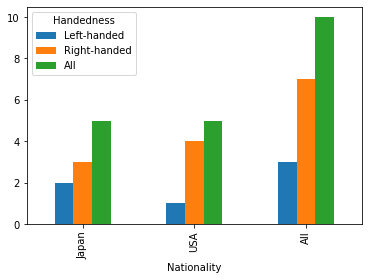

In [102]:
a.plot.bar() # :-)

In [106]:
b = pd.crosstab([tips["time"], tips["day"]], tips["smoker"], margins=True)
b

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

<AxesSubplot:xlabel='time,day'>

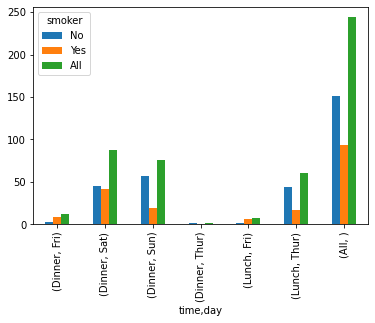

In [107]:
b.plot.bar()